<font size = "5"> **[pyTEMlib](0_pyTEMlib.ipynb)** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />

[<img src=https://www.coeuscreativegroup.com/wp-content/uploads/2020/04/download-button.png, width=125>](https://raw.githubusercontent.com/pycroscopy/pyTEMlib/main/notebooks/Introduction/2_Open_Files.ipynb)

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/pycroscopy/pyTEMlib/blob/main/notebooks/Introduction/2_Open_Files.ipynb)


<font size = "5"> **[pyTEMlib](0_pyTEMlib.ipynb)**, a **pycroscopy** library </font>

# Open Files
<font size = "5"> **[pyTEMlib](https://pycroscopy.github.io/pyTEMlib/about.html)**</font>

a [pycroscopy](https://pycroscopy.github.io/pycroscopy/about.html) ecosystem package


Notebook by Gerd Duscher, 2025

Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes

## Scope

This notebook shows how to open a file, and plot datasets.
Files with more than one dataset (for examples spectrum images) are handled in an intuitive way.

>Note:
> You can combine and arrange these datasets yourself to your liking.

All ususal file-types used in microscopy are handled.  


## Check Installtion

In google colab, with always a clean, new python installation, you will have to run this every (run)time.


In [ ]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2025.12.1':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q

print('done')

## Load Necessary Packages

We will generally need:
- numpy: the numeric library
- matplotlib: the plotting library activated for jupyter notebooks (%matplotlib widget)
- pyTEMlib

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

import pyTEMlib
print('pyTEMlib version', pyTEMlib.__version__)

pyTEMlib version 0.2025.12.0


## Open File and Plot

The reading of files is enabled by **SciFiReaders** package of the pycroscopy ecosystem.

All files are internally converted to the **sidpy** format in memory. This allows the usage of any package in pycroscopy including plotting.

The datasets are always organized in python dictionaries (dict), a container with a key and a dataset. 

Anything can  be added to such a dictionary and then be saved. This alllows for the flexible dataset structure necessary for microscopy.

### Chose Filee
The widget started below allows to choose a file even in google colab.

The opening and reading of files is enabled by the file_tools library of pyTEMlib

**Select Main** after you navigated to the file to view.

Adding another file to the dataset dictionary is helpful

In [3]:
file_list = pyTEMlib.file_tools.FileWidget()

### Plotting the dataset
Once you have selected a dataset, we can plot it. If there is more than one dataset in the file you can select the primary one in the drop down menu next to the buttons

>Note:
>
>Plotting comand is independent of dataset type. This type can be set in a sidpy dataset.


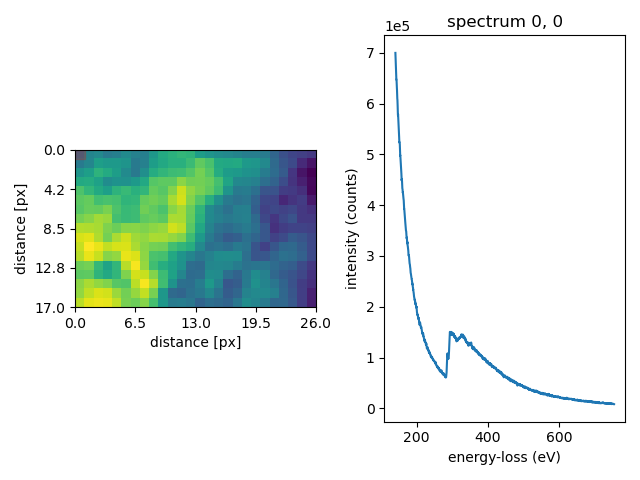

In [5]:
dataset_collection = file_list.datasets

dataset = file_list.selected_dataset
view = dataset.plot()


In [7]:
### Select a different dataset

In [6]:
dataset_chooser = pyTEMlib.file_tools.ChooseDataset(dataset_collection)

Dropdown(description='select dataset:', options=('Channel_000: HAADF Image (SI Survey)', 'Channel_001: HAADF I…

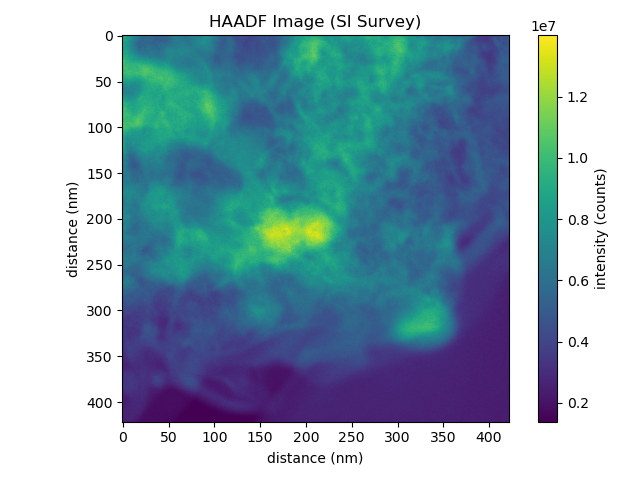

In [8]:
view = dataset_chooser.dataset.plot()

## Save
All datasets in a dictionary (here: dataset_collection) can be saved in one file

Check out the different datasets

In [10]:
dataset_collection.keys()

dict_keys(['Channel_000', 'Channel_001', 'Channel_002', 'Channel_003'])

The data are saved in the NSID data format, a format based on hdf5, that is readable on any computer including supercomputers.

The format is NEXUS compatible.


In [11]:
group = pyTEMlib.file_tools.save_dataset(dataset_collection, filename=dataset.metadata['filename'])

C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\pyNSID\io\hdf_utils.py:381: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\pyNSID\io\hdf_utils.py:381: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\pyNSID\io\hdf_utils.py:381: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\pyNSID\io\hdf_utils.py:381: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',


## Summary

Any common microscopy dataset can be read and plotted.

The datasets are represented in a consistent way in memory and any package of pycroscopy can be used with those.
